<a href="https://colab.research.google.com/github/krishnaveni-sk/Flower_Classification/blob/main/categorical_CNN_model_flower_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/flower_images.zip' -d '/content/drive/MyDrive/flower_images'


Archive:  /content/drive/MyDrive/flower_images.zip
replace /content/drive/MyDrive/flower_images/flower_images/Lilly/00048a5c76.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: NONE


In [ ]:
!ls "/content/drive/MyDrive/flower_images"


flower_images  Lilly  Lotus  Orchid  Sunflower	Tulip


In [ ]:
input_folder = "/content/drive/MyDrive/flower_images/flower_images"  # nested folder
output_folder = "/content/drive/MyDrive/flowers_split"


In [ ]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))


Copying files: 5000 files [02:14, 37.21 files/s]


In [ ]:
!ls "/content/drive/MyDrive/flowers_split/train"


Lilly  Lotus  Orchid  Sunflower  Tulip


In [ ]:
train_dir = output_folder + "/train"
val_dir   = output_folder + "/val"


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
img_size = (150, 150)
batch_size = 32


In [ ]:
# ✅ STEP 4: Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [ ]:
# ✅ STEP 5: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ✅ STEP 6: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# ✅ STEP 7: Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.3400 - loss: 1.5029 - val_accuracy: 0.5460 - val_loss: 1.1588
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.5110 - loss: 1.2058 - val_accuracy: 0.5630 - val_loss: 1.0978
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.5410 - loss: 1.1521 - val_accuracy: 0.5910 - val_loss: 1.0166
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.5733 - loss: 1.1077 - val_accuracy: 0.6090 - val_loss: 0.9869
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.5916 - loss: 1.0368 - val_accuracy: 0.6260 - val_loss: 0.9213
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.5983 - loss: 1.0036 - val_accuracy: 0.6200 - val_loss: 0.9369
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.6221 - loss: 0.9506 - val_accuracy: 0.6480 - val_loss: 0.8935
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.6218 - loss: 0.9599 - val_accu

In [ ]:
# ✅ STEP 8: Evaluate Model
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")
print(f"validation Loss: {loss*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 638ms/step - accuracy: 0.6686 - loss: 0.8319
Validation Accuracy: 69.30%
validation Loss: 79.58%


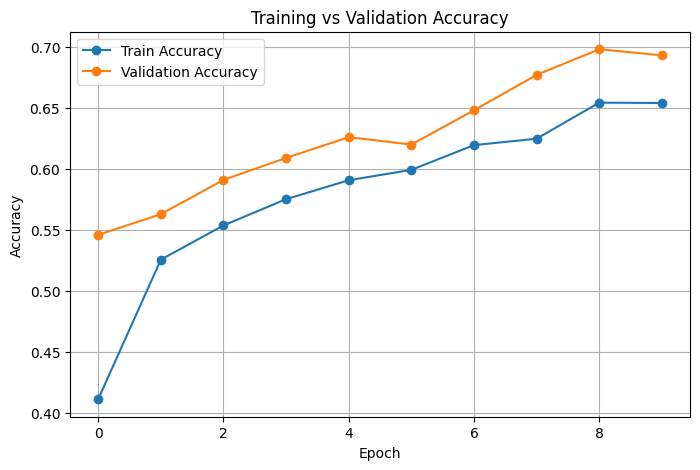

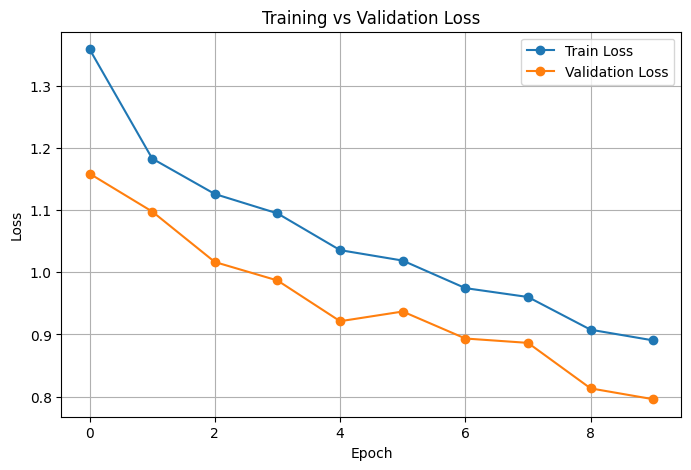

In [ ]:
import matplotlib.pyplot as plt

# ✅ Accuracy Plot
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Loss Plot
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/colab Notebooks/flower_cnn_model.h5")
print("✅ Model saved at /content/drive/MyDrive/colab Notebook/flower_cnn_model.h5")

✅ Model saved at /content/drive/MyDrive/colab Notebook/flower_cnn_model.h5


In [ ]:
!ls "/content/drive/MyDrive/"


'colab Notebooks'   flower_images       Krishnaveni-resume.pdf
'Colab Notebooks'   flower_images.zip   link
 dataset	    flowers_split       Plant_disease_model_ks.ipynb


In [ ]:
!mv "/content/drive/MyDrive/colab notebooks/flower_cnn_model.h5" "/content/drive/MyDrive/Colab Notebooks/flower_cnn_model.h5"
print("✅ Model moved successfully to correct folder!")


mv: cannot stat '/content/drive/MyDrive/colab notebooks/flower_cnn_model.h5': No such file or directory
✅ Model moved successfully to correct folder!


In [ ]:
!ls "/content/drive/MyDrive/colab notebooks/"
!ls "/content/drive/"


ls: cannot access '/content/drive/MyDrive/colab notebooks/': No such file or directory
MyDrive


In [ ]:
!ls "/content/drive/MyDrive/" | grep h5


In [ ]:
# Assuming your model variable is 'model'
model.save("/content/drive/MyDrive/Colab Notebooks/flower_cnn_model.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/" | grep h5


flower_cnn_model.h5


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/flower_cnn_model.h5")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


✅ Model loaded successfully!


Saving wp3466190.jpg to wp3466190 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


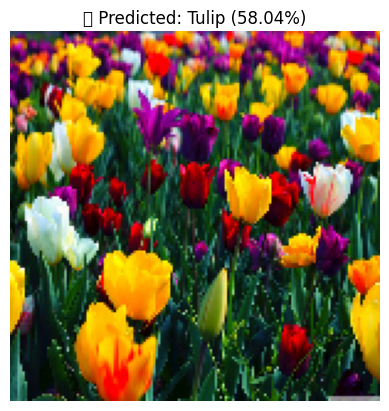

✅ Prediction: Tulip (58.04%)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

# ✅ Step 1: Load saved model
model_path = "/content/drive/MyDrive/colab Notebooks/flower_cnn_model.h5"
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# ✅ Step 2: Define classes
class_names = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

# ✅ Step 3: Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    img = image.load_img(filename, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)/255.0

    # Predict
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)*100

    # Display
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"🌸 Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.show()

    print(f"✅ Prediction: {predicted_class} ({confidence:.2f}%)")
